In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #support vector regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

from sklearn import metrics

In [6]:
#loading the dataset to a pandas dataframe
ins_dataset = pd.read_csv("/home/cauvery/Downloads/Medical Price Dataset.csv")

In [7]:
#checking top 5 rows of the dataset
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#checking last 5 rows of the dataset
ins_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
#checking number of rows and columns
ins_dataset.shape

(1338, 7)

In [10]:
#getting more information about the dataset
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#checking null values in the dataset
ins_dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> We dont have any missing values in this dataset

In [13]:
#statistical measures of thge dataset
ins_dataset.describe() #displays stats for numerical columns only

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#ins_dataset.describe(include="all") #displays stats for numerical as well as categorical columns

# Data Preprocessing

**Converting categorical columns --sex, smoker, region to numerical values**

In [15]:
ins_dataset["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
#converting sex column values to numeric values
ins_dataset["sex"] = ins_dataset["sex"].map({"female":0, "male":1})

In [17]:
ins_dataset["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
#converting smoker column values to numeric values
ins_dataset["smoker"] = ins_dataset["smoker"].map({"yes":0, "no":1})

In [19]:
ins_dataset["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
#converting region column values to numeric values
ins_dataset["region"] = ins_dataset["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

In [21]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [22]:
ins_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
#separating the features and label
X = ins_dataset.drop(["charges"], axis=1)

In [24]:
y = ins_dataset["charges"]

# Train & Test Split

In [25]:
#splitting X,Y into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [27]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,1,2
1285,47,0,24.320,0,1,3
1142,52,0,24.860,0,1,1
969,39,0,34.320,5,1,1
486,54,0,21.470,3,1,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,1,3
1130,39,0,23.870,5,1,1
1294,58,1,25.175,0,1,3
860,37,0,47.600,2,0,0


In [28]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Model Training

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Prediction on Test Data

In [30]:
y_pred1 = lr.predict(X_test)
df1 = pd.DataFrame({"Actual":y_test, "lr":y_pred1})

In [31]:
df1

,Actual,lr
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008
...,...,...
109,47055.53210,39116.968669
575,12222.89830,11814.555568
535,6067.12675,7638.107736
543,63770.42801,40959.081722


**Visualising Actual vs Predicted Values**

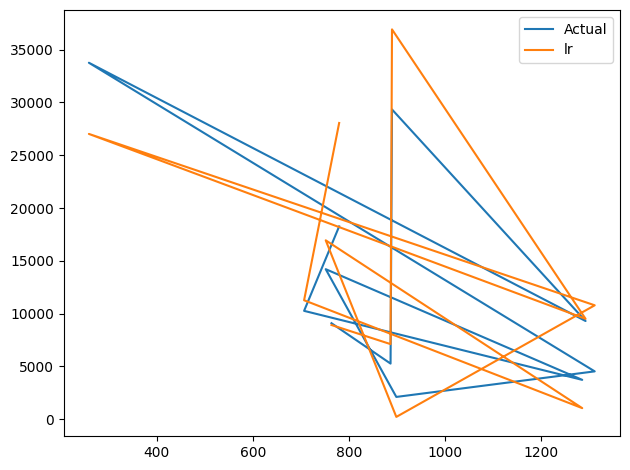

In [32]:
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["lr"].iloc[0:11], label="lr")
plt.legend()
plt.tight_layout()

**Let's further evaluate our model to select the best one**

# Evaluating the Algorithm

In [33]:
#r-squared
rs1 = metrics.r2_score(y_test, y_pred1)

In [34]:
print(rs1)

0.7833463107364539


In [35]:
#mean absolute error
mae1 = metrics.mean_absolute_error(y_test, y_pred1)


In [36]:
print(mae1)

4186.508898366432
